In [42]:
#librerias usaadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz

from subprocess import call
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

def showMetric(test,prediction):
    # Model Accuracy: how often is the classifier correct?
    print("Accuracy:", metrics.accuracy_score(test, prediction))
    # Model Precision: what percentage of positive tuples are labeled as such?
    print("Precision:", metrics.precision_score(test, prediction))
    # Model Recall: what percentage of positive tuples are labelled as such?
    print("Recall:", metrics.recall_score(test, prediction))
    
def showMetric2(test,prediction):
    # Calcule MSE con scikit-learn
    print("MSE:",metrics.mean_squared_error(y_test, y_pred))
    # Calcule el RMSE con scikit-learn
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("MAE:",mean_absolute_error(y_test, y_pred))
    
def plotStandarization():
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24, 7))
    # let's compare the variable distributions before and after scaling

    for (label, content) in x_train.iteritems():
        ax1.set_title('Before Scaling')
        sns.kdeplot(x_train[label], ax=ax1, label=label)
        leg = ax1.legend(loc="upper left", bbox_to_anchor=[0, 1],
                     ncol=2, shadow=True, title="Legend", fancybox=True)
    
    for (label, content) in x_train_scaled.iteritems():
        ax2.set_title('After Mean Normalisation')
        sns.kdeplot(x_train_scaled[label], ax=ax2, label=label)
        leg = ax2.legend(loc="upper left", bbox_to_anchor=[0, 1],
                     ncol=2, shadow=True, title="Legend", fancybox=True)

    plt.show() 

In [43]:
#Recolectar datos de los dataset
figth_data =  pd.read_csv('../fight_data.csv',header=0)
fighter_details =  pd.read_csv('../raw_fighter_details.csv')

In [44]:
#Comando para ver todas las columnas del dataset
pd.set_option('display.max_columns', None)
#mostrar datos de fight_data.csv
figth_data

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,6.000,6.000,58.0000,30.0,48.0000,15.5000,0.5000,0.5000,0.5000,0.50,7

In [45]:
#tipos de datos en raw_fighter_details
fighter_details.dtypes

fighter_name     object
Height           object
Weight           object
Reach            object
Stance           object
DOB              object
SLpM            float64
Str_Acc          object
SApM            float64
Str_Def          object
TD_Avg          float64
TD_Acc           object
TD_Def           object
Sub_Avg         float64
dtype: object

In [46]:
#Calculo de porcentaje de victoria
def x(a,b,c):
    if (a<=0):
        respuesta=0
    else:
        respuesta=(a/(a+b+c))*100
    
    return respuesta

figth_data_R=figth_data.loc[:, ['R_fighter', 'R_wins', 'R_losses','R_draw','date']]
figth_data_B=figth_data.loc[:, ['B_fighter', 'B_wins', 'B_losses','B_draw','date']]

figth_data_R['victoria_%']  = figth_data_R.apply(lambda f: x(f['R_wins']
                                                             ,f['R_losses']
                                                             ,f['R_draw']), axis=1)
figth_data_B['victoria_%']  = figth_data_B.apply(lambda f: x(f['B_wins']
                                                             ,f['B_losses']
                                                             ,f['B_draw']), axis=1)

In [47]:
#borrar columnas de calculo de porcentaje de victoria
figth_data_R=figth_data_R.drop(['R_wins','R_losses','R_draw'], axis=1)
figth_data_B=figth_data_B.drop(['B_wins','B_losses','B_draw'], axis=1)

In [48]:
#tomar el ultimo registro de pelea
figth_data_B=figth_data_B.rename({'B_fighter': 'fighter'}, axis=1)
figth_data_R=figth_data_R.rename({'R_fighter': 'fighter'}, axis=1)
figth_data_B=figth_data_B.sort_values('date').groupby('fighter').tail(1)
figth_data_R=figth_data_R.sort_values('date').groupby('fighter').tail(1)
figth_data=figth_data_R.append(figth_data_B, ignore_index=True)
#figth_data=figth_data_B.drop(['date'], axis=1)

C:\Users\andre\AppData\Local\Temp/ipykernel_16376/2527503277.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  figth_data=figth_data_R.append(figth_data_B, ignore_index=True)


In [49]:
# Ordenar valores por nombre de peleador rojo
figth_data_R.sort_values(by=['fighter'])

,fighter,date,victoria_%
510,Aalon Cruz,2020-02-29,0.000000
3168,Aaron Phillips,2014-08-23,0.000000
3686,Aaron Riley,2013-07-27,37.500000
4267,Aaron Rosa,2011-11-12,0.000000
3954,Aaron Simpson,2012-10-05,70.000000
...,...,...,...
624,Zelim Imadaev,2019-11-09,0.000000
2818,Zhang Lipeng,2015-05-16,66.666667
3936,Zhang Tiequan,2012-11-10,33.333333
493,Zhang Weili,2020-03-07,100.000000


In [50]:
# Ordenar valores por nombre de peleador azul
figth_data_B.sort_values(by=['fighter'])

,fighter,date,victoria_%
34,Aalon Cruz,2021-03-06,0.000000
5779,Aaron Brink,2000-11-17,0.000000
375,Aaron Phillips,2020-07-15,0.000000
4315,Aaron Riley,2011-09-24,42.857143
4148,Aaron Rosa,2012-03-02,50.000000
...,...,...,...
284,Zelim Imadaev,2020-09-05,0.000000
89,Zhalgas Zhumagulov,2021-01-23,0.000000
3414,Zhang Lipeng,2014-03-01,0.000000
751,Zhang Weili,2019-08-31,100.000000


In [51]:
#tomar los ultimos registros de datos duplicados
figth_data=figth_data.sort_values('date').groupby('fighter').tail(1)
figth_data=figth_data.drop(['date'], axis=1)
figth_data

,fighter,victoria_%
1516,Scott Morris,100.000000
1519,Fred Ettish,0.000000
1520,Ray Wizard,0.000000
1521,Thaddeus Luster,0.000000
1522,Scott Baker,0.000000
...,...,...
1511,Tai Tuivasa,57.142857
1512,Trevin Giles,66.666667
1513,Adrian Yanez,100.000000
1504,Bruno Silva,0.000000


In [52]:
#resultado de eliminación de duplicados
figth_data.sort_values(by=['fighter'])

,fighter,victoria_%
3473,Aalon Cruz,0.000000
1654,Aaron Brink,0.000000
3182,Aaron Phillips,0.000000
400,Aaron Riley,37.500000
2118,Aaron Rosa,50.000000
...,...,...
3419,Zhalgas Zhumagulov,0.000000
564,Zhang Lipeng,66.666667
356,Zhang Tiequan,33.333333
1149,Zhang Weili,100.000000


In [53]:
#crear un binning
figth_data['binning']=pd.cut(figth_data['victoria_%'],[-0.1, 51, 101], labels=[0,1])

In [54]:
#resultado de binning
figth_data.sort_values(by=['fighter'])

,fighter,victoria_%,binning
3473,Aalon Cruz,0.000000,0
1654,Aaron Brink,0.000000,0
3182,Aaron Phillips,0.000000,0
400,Aaron Riley,37.500000,0
2118,Aaron Rosa,50.000000,0
...,...,...,...
3419,Zhalgas Zhumagulov,0.000000,0
564,Zhang Lipeng,66.666667,1
356,Zhang Tiequan,33.333333,0
1149,Zhang Weili,100.000000,1


In [55]:
#ver distribución de binning
figth_data['binning'].value_counts()

0    1412
1     727
Name: binning, dtype: int64

In [56]:
#redondeo victoria
figth_data['victoria_%']=np.around(figth_data['victoria_%'], 0)  
figth_data['victoria_%'].apply(np.round)
figth_data = figth_data.astype({"victoria_%": int})

In [57]:
#unir tablas
fight_inner = pd.merge(left=figth_data, right=fighter_details
                       ,how='inner', left_on='fighter', right_on='fighter_name')

In [58]:
#Resultado de unir tablas
fight_inner

,fighter,victoria_%,binning,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Scott Morris,100,1,Scott Morris,"5' 10""",210 lbs.,NaN,Orthodox,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Fred Ettish,0,0,Fred Ettish,"6' 0""",180 lbs.,NaN,Southpaw,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
2,Ray Wizard,0,0,Ray Wizard,NaN,NaN,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3,Thaddeus Luster,0,0,Thaddeus Luster,"6' 3""",210 lbs.,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Scott Baker,0,0,Scott Baker,"6' 0""",210 lbs.,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,Tai Tuivasa,57,1,Tai Tuivasa,"6' 2""",264 lbs.,"75""",Southpaw,"Mar 16, 1993",4.38,50%,3.44,50%,0.00,0%,46%,0.0
2135,Trevin Giles,67,1,Trevin Giles,"6' 0""",185 lbs.,"74""",Orthodox,"Aug 06, 1992",3.26,56%,1.88,62%,1.37,80%,79%,0.3
2136,Adrian Yanez,100,1,Adrian Yanez,"5' 7""",135 lbs.,"70""",Orthodox,"Nov 29, 1993",4.69,44%,2.31,55%,0.00,0%,100%,0.0
2137,Bruno Silva,0,0,Bruno Silva,"6' 0""",185 lbs.,NaN,NaN,"Jul 13, 1989",0.00,0%,0.00,0%,0.00,0%,0%,0.0


In [59]:
#Resultado de datos nulos en el dataset
for (label, content) in fight_inner.iteritems():
    print('Nombre de la columna: ', label)
    print(fight_inner[label].isnull().sum())

Nombre de la columna:  fighter
0
Nombre de la columna:  victoria_%
0
Nombre de la columna:  binning
0
Nombre de la columna:  fighter_name
0
Nombre de la columna:  Height
13
Nombre de la columna:  Weight
10
Nombre de la columna:  Reach
649
Nombre de la columna:  Stance
75
Nombre de la columna:  DOB
141
Nombre de la columna:  SLpM
0
Nombre de la columna:  Str_Acc
0
Nombre de la columna:  SApM
0
Nombre de la columna:  Str_Def
0
Nombre de la columna:  TD_Avg
0
Nombre de la columna:  TD_Acc
0
Nombre de la columna:  TD_Def
0
Nombre de la columna:  Sub_Avg
0


In [60]:
#eliminar columnas innecesarias para el modelo
fight_inner=fight_inner.drop(['Reach','DOB','fighter_name'], axis=1)
fight_inner

,fighter,victoria_%,binning,Height,Weight,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Scott Morris,100,1,"5' 10""",210 lbs.,Orthodox,0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Fred Ettish,0,0,"6' 0""",180 lbs.,Southpaw,0.00,0%,0.00,0%,0.00,0%,0%,0.0
2,Ray Wizard,0,0,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3,Thaddeus Luster,0,0,"6' 3""",210 lbs.,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Scott Baker,0,0,"6' 0""",210 lbs.,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,Tai Tuivasa,57,1,"6' 2""",264 lbs.,Southpaw,4.38,50%,3.44,50%,0.00,0%,46%,0.0
2135,Trevin Giles,67,1,"6' 0""",185 lbs.,Orthodox,3.26,56%,1.88,62%,1.37,80%,79%,0.3
2136,Adrian Yanez,100,1,"5' 7""",135 lbs.,Orthodox,4.69,44%,2.31,55%,0.00,0%,100%,0.0
2137,Bruno Silva,0,0,"6' 0""",185 lbs.,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0


In [61]:
import math
#conversion de estructura de los datos
def convporcentaje(a):
    for i in range(len(fight_inner)):
    
        if ((pd.isnull(fight_inner.iloc[i][a]))):
            print('')
        else:
            fight_inner.iloc[i, fight_inner.columns.get_loc(a)]=(int(fight_inner.iloc[i][a].split("%")[0]))


for i in range(len(fight_inner)):
    
    if ((pd.isnull(fight_inner.iloc[i]['Height']))):
        print('')
    else:
        fight_inner.iloc[i, fight_inner.columns.get_loc('Height')]=math.floor(
            (int(fight_inner.iloc[i]['Height'].split("' ")[0])*30.48 
             + int(fight_inner.iloc[i]['Height'].split(" ")[1].split('"')[0])*2.54))
        
for i in range(len(fight_inner)):
    
    if ((pd.isnull(fight_inner.iloc[i]['Weight']))):
        print('')
    else:
        fight_inner.iloc[i, fight_inner.columns.get_loc('Weight')]=(int(fight_inner.iloc[i]['Weight'].split(" ")[0]))
        
for i in range(len(fight_inner)):
    
    if ((pd.isnull(fight_inner.iloc[i]['Stance']))):
        fight_inner.iloc[i, fight_inner.columns.get_loc('Stance')]=('Orthodox')

        
        
convporcentaje('Str_Acc')
convporcentaje('Str_Def')
convporcentaje('TD_Acc')
convporcentaje('TD_Def')

In [62]:
#Resultados de conversión de estructura
fight_inner

,fighter,victoria_%,binning,Height,Weight,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Scott Morris,100,1,177,210,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0
1,Fred Ettish,0,0,182,180,Southpaw,0.00,0,0.00,0,0.00,0,0,0.0
2,Ray Wizard,0,0,NaN,NaN,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0
3,Thaddeus Luster,0,0,190,210,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0
4,Scott Baker,0,0,182,210,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,Tai Tuivasa,57,1,187,264,Southpaw,4.38,50,3.44,50,0.00,0,46,0.0
2135,Trevin Giles,67,1,182,185,Orthodox,3.26,56,1.88,62,1.37,80,79,0.3
2136,Adrian Yanez,100,1,170,135,Orthodox,4.69,44,2.31,55,0.00,0,100,0.0
2137,Bruno Silva,0,0,182,185,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0


In [63]:
#Renombrar variables
fight_inner=fight_inner.rename({'Str_Acc': 'Str_Acc_%',
                                  'Str_Def': 'Str_Def_%',
                                  'TD_Acc': 'TD_Acc_%',
                                  'TD_Def': 'TD_Def_%'}, axis=1)
#generar variable dummy
fight_inner = pd.get_dummies(fight_inner, columns=['Stance'])
fight_inner=fight_inner.drop(['Stance_Switch','Stance_Open Stance','Stance_Sideways'], axis=1)

#eliminar datos nulos
fight_inner = fight_inner[fight_inner['Height'].notna()]
fight_inner = fight_inner[fight_inner['Weight'].notna()]

In [64]:
X=fight_inner.iloc[:, 3:]
X=pd.concat([X, fight_inner.iloc[:, 1]], axis= 1)
y=fight_inner.iloc[:, 2]

In [65]:
#Dividir el dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=2)

#uso de KFold
kf = KFold(n_splits=3,shuffle=True,random_state=2)
fight_inner

,fighter,victoria_%,binning,Height,Weight,SLpM,Str_Acc_%,SApM,Str_Def_%,TD_Avg,TD_Acc_%,TD_Def_%,Sub_Avg,Stance_Orthodox,Stance_Southpaw
0,Scott Morris,100,1,177,210,0.00,0,0.00,0,0.00,0,0,0.0,1,0
1,Fred Ettish,0,0,182,180,0.00,0,0.00,0,0.00,0,0,0.0,0,1
3,Thaddeus Luster,0,0,190,210,0.00,0,0.00,0,0.00,0,0,0.0,1,0
4,Scott Baker,0,0,182,210,0.00,0,0.00,0,0.00,0,0,0.0,1,0
5,Alberta Cerra Leon,0,0,172,238,0.00,0,0.00,0,0.00,0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,Tai Tuivasa,57,1,187,264,4.38,50,3.44,50,0.00,0,46,0.0,0,1
2135,Trevin Giles,67,1,182,185,3.26,56,1.88,62,1.37,80,79,0.3,1,0
2136,Adrian Yanez,100,1,170,135,4.69,44,2.31,55,0.00,0,100,0.0,1,0
2137,Bruno Silva,0,0,182,185,0.00,0,0.00,0,0.00,0,0,0.0,1,0


In [66]:
# # the scaler - for standardisation
# np.round(x_train.describe(), 1)
from sklearn.preprocessing import RobustScaler
scaled_features = x_train.copy()
col_names = ['Height','Weight','Str_Acc_%','Str_Def_%',
             'TD_Acc_%','SLpM','SApM','TD_Avg','Sub_Avg','TD_Def_%']
features = scaled_features[col_names]
scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
x_train_scaled = pd.DataFrame(scaled_features, columns=x_train.columns)
y_train_scaled = pd.DataFrame(y_train.to_frame(), columns=y_train.to_frame().columns)
scaled_features2 = x_test.copy()
col_names2 = ['Height','Weight','Str_Acc_%','Str_Def_%',
             'TD_Acc_%','SLpM','SApM','TD_Avg','Sub_Avg','TD_Def_%']
features2 = scaled_features2[col_names2]
features2 = scaler.transform(features2.values)
scaled_features2[col_names2] = features2
x_test_scaled = pd.DataFrame(scaled_features2, columns=x_test.columns)


In [67]:
np.round(x_train_scaled.describe(), 1)

,Height,Weight,SLpM,Str_Acc_%,SApM,Str_Def_%,TD_Avg,TD_Acc_%,TD_Def_%,Sub_Avg,Stance_Orthodox,Stance_Southpaw,victoria_%
count,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0
mean,-0.1,0.1,0.0,-0.2,0.1,-0.3,0.2,-0.0,-0.1,0.4,0.8,0.2,38.0
std,0.7,1.0,0.8,1.1,1.1,1.2,0.8,0.5,0.7,1.4,0.4,0.4,33.0
min,-2.2,-1.4,-1.3,-3.0,-1.6,-3.8,-0.5,-0.7,-1.3,-0.3,0.0,0.0,0.0
25%,-0.6,-0.6,-0.5,-0.5,-0.5,-0.6,-0.5,-0.7,-0.6,-0.3,1.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,44.0
75%,0.4,0.4,0.5,0.5,0.5,0.4,0.5,0.3,0.4,0.7,1.0,0.0,62.0
max,2.2,15.0,8.5,4.1,10.8,3.4,6.5,1.3,1.1,24.0,1.0,1.0,100.0


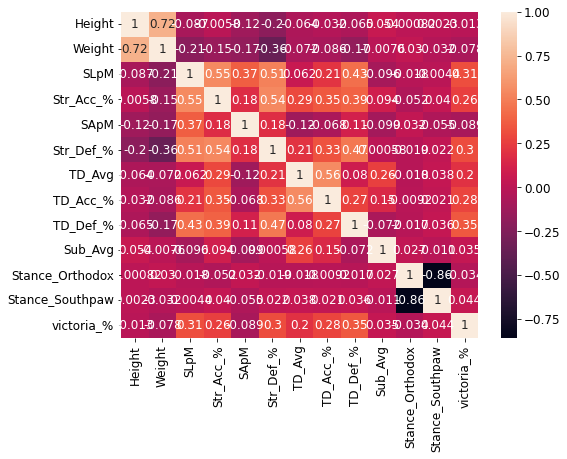

In [68]:
#plotStandarization()
# print(type(y_train_scaled))
# Fin = pd.concat([x_train_scaled, y_train_scaled], axis= 1)
#Fin=pd.DataFrame (y_train.tolist(), columns = ['winning'])
#Fin = pd.concat([x_train_scaled, Fin], axis= 1)

plt.figure(figsize=(8, 6))
sns.heatmap(x_train_scaled.corr(method='pearson'), annot=True)
plt.show()
x_train_scaled=x_train_scaled.drop(['victoria_%'], axis=1)
x_test_scaled=x_test_scaled.drop(['victoria_%'], axis=1)

In [69]:
print(x_train_scaled)
print(x_test_scaled)
print(y_train)
print(y_test)

        Height  Weight      SLpM  Str_Acc_%      SApM  Str_Def_%    TD_Avg  \
969   0.769231   1.800  0.637824   0.357143 -0.848404   0.928571 -0.316832   
157   0.384615   2.625 -1.349815  -3.000000 -1.630319  -3.785714 -0.480198   
1858  0.384615   0.875  0.108776   0.071429  0.502660  -0.071429  0.480198   
707   0.384615  -0.625  0.316440   0.142857 -0.194149  -0.214286 -0.014851   
1446  0.769231   2.250  1.582200  -0.357143 -0.103723   0.214286 -0.123762   
...        ...     ...       ...        ...       ...        ...       ...   
1084 -0.384615  -0.375 -0.004944  -0.285714 -0.529255   0.928571 -0.237624   
444  -0.230769  -0.375 -0.647713  -0.642857 -0.422872   0.428571  0.356436   
687   0.384615   0.000  0.138443   0.000000 -0.172872   0.071429  1.257426   
1112  1.153846   0.375 -0.173053   0.642857 -0.023936  -0.928571  0.940594   
1621 -2.000000  -1.375 -0.217553   0.000000 -0.114362   0.000000  1.222772   

      TD_Acc_%  TD_Def_%   Sub_Avg  Stance_Orthodox  Stance_Sou

# RANDOM FOREST

Accuracy: 0.768025078369906
Precision: 0.6745562130177515
Recall: 0.5507246376811594
Best value of each hyperparameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 1000}
Ensemble(random forest) accuracy score:  76.8 %


[Text(380.80422794117646, 504.7714285714286, 'X[2] <= -0.452\nentropy = 0.944\nsamples = 916\nvalue = [950, 538]'),
 Text(203.09558823529412, 427.11428571428576, 'X[7] <= 0.86\nentropy = 0.522\nsamples = 254\nvalue = [353, 47]'),
 Text(110.77941176470588, 349.4571428571429, 'X[1] <= 0.938\nentropy = 0.462\nsamples = 234\nvalue = [332, 36]'),
 Text(61.544117647058826, 271.8, 'X[9] <= 1.944\nentropy = 0.369\nsamples = 186\nvalue = [275, 21]'),
 Text(49.23529411764706, 194.14285714285717, 'X[3] <= -0.393\nentropy = 0.408\nsamples = 162\nvalue = [236, 21]'),
 Text(24.61764705882353, 116.48571428571432, 'X[5] <= 0.464\nentropy = 0.253\nsamples = 104\nvalue = [158, 7]'),
 Text(12.308823529411764, 38.82857142857142, 'entropy = 0.151\nsamples = 88\nvalue = [135, 3]'),
 Text(36.92647058823529, 38.82857142857142, 'entropy = 0.605\nsamples = 16\nvalue = [23, 4]'),
 Text(73.85294117647058, 116.48571428571432, 'X[1] <= 0.2\nentropy = 0.615\nsamples = 58\nvalue = [78, 14]'),
 Text(61.544117647058826

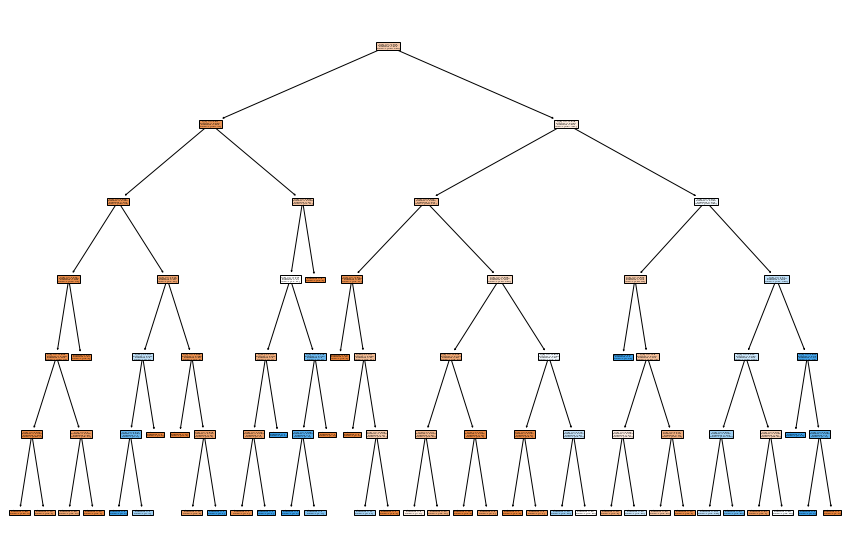

In [70]:
#x_test_scaled=x_test_scaled.drop(['victoria_%'], axis=1)
#x_test_scaled=x_test_scaled.drop(['binning'], axis=1)
#x_train_scaled=x_test_scaled.drop(['victoria_%'], axis=1)
# parameters = [{'criterion':['gini', 'entropy'],
#                'max_depth':[20,40,50],
#                'max_features': [5, 6,,7],
#                "min_samples_split": range(1,100),
#                 "min_samples_leaf": range(1,30)}]

parameters = [{
                'n_estimators': [200, 500,1000],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8],
                'criterion' :['gini', 'entropy']
              }]
rfc=RandomForestClassifier(random_state=2)
grid = GridSearchCV(estimator = rfc, param_grid = parameters, cv = kf, n_jobs=-1)
grid.fit(x_train_scaled, y_train)

#model = RandomForestClassifier(random_state=2)

randomforest_model = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
                                            criterion = grid.best_params_['criterion'],
                                            max_depth = grid.best_params_['max_depth'],
                                           max_features=grid.best_params_['max_features'],random_state=2)
randomforest_model.fit(x_train_scaled, y_train)
randomforest_score_kfold = randomforest_model.score(x_test_scaled, y_test)
y_pred = randomforest_model.predict(x_test_scaled)
showMetric(y_test,y_pred)
print("Best value of each hyperparameters: {}".format(grid.best_params_))
print("Ensemble(random forest) accuracy score: ", round(randomforest_score_kfold*100,2), "%")

plt.figure(figsize=(15,10))
tree.plot_tree(randomforest_model.estimators_[1], filled=True)

In [71]:
y_train

969     1
157     1
1858    0
707     1
1446    1
       ..
1084    0
444     0
687     1
1112    1
1621    1
Name: binning, Length: 1488, dtype: category
Categories (2, int64): [0 < 1]

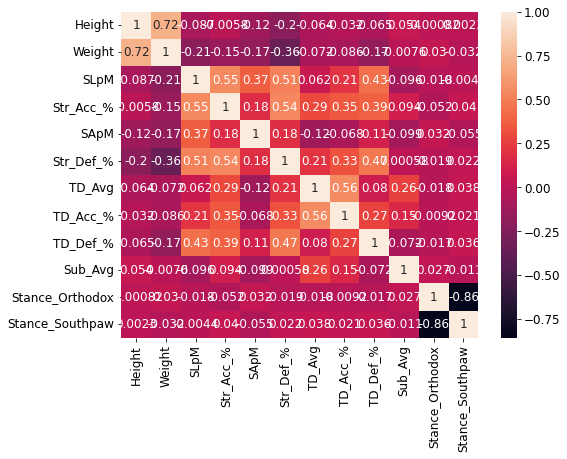

,Details
Machine Learning Classification Method,Random Forest Classifier
Train Accuracy,0.858199
Test Accuracy,0.768025
Top 1 Feature Predictor,SLpM
Top 2 Feature Predictor,TD_Def_%
Top 3 Feature Predictor,Str_Def_%
Top 4 Feature Predictor,SApM
Top 5 Feature Predictor,TD_Acc_%
Top 6 Feature Predictor,TD_Avg
Top 7 Feature Predictor,Str_Acc_%


In [72]:
#x_train_scaled=x_train_scaled.drop(['Height','Weight','Str_Acc_%','Sub_Avg','Stance_Orthodox','Stance_Southpaw'], axis=1)
Fin = pd.concat([x_train_scaled.reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis= 1)
#print(pd.DataFrame(y_train))
#print(type(x_train_scaled))

corr_df = Fin.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

randomforest_model = RandomForestClassifier(n_estimators=500,
                                            criterion = 'gini',
                                            max_depth = 7,
                                           max_features='auto',random_state=2)
randomforest_model.fit(x_train_scaled, y_train)
randomforest_score_kfold = randomforest_model.score(x_test_scaled, y_test)
df = pd.DataFrame()
cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor",
       "Top 6 Feature Predictor","Top 7 Feature Predictor","Top 8 Feature Predictor"]

df.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Classifier'
df.loc['Train Accuracy', 'Details'] = randomforest_model.score(x_train_scaled, y_train) 
df.loc['Test Accuracy', 'Details'] = randomforest_model.score(x_test_scaled, y_test)
feature_importances = x_train_scaled.columns[np.argsort(randomforest_model.feature_importances_)][-11:]
df.loc['Top 1 Feature Predictor', 'Details'] = feature_importances[10]
df.loc['Top 2 Feature Predictor', 'Details'] = feature_importances[9]
df.loc['Top 3 Feature Predictor', 'Details'] = feature_importances[8]
df.loc['Top 4 Feature Predictor', 'Details'] = feature_importances[7]
df.loc['Top 5 Feature Predictor', 'Details'] = feature_importances[6]
df.loc['Top 6 Feature Predictor', 'Details'] = feature_importances[5]
df.loc['Top 7 Feature Predictor', 'Details'] = feature_importances[4]
df.loc['Top 8 Feature Predictor', 'Details'] = feature_importances[3]
df.loc['Top 9 Feature Predictor', 'Details'] = feature_importances[2]
df.loc['Top 10 Feature Predictor', 'Details'] = feature_importances[1]
df.loc['Top 11 Feature Predictor', 'Details'] = feature_importances[0]

display(df)



x_test_scaled=x_test_scaled[[feature_importances[9],feature_importances[10]
                            ,feature_importances[7],feature_importances[8]
                            ,feature_importances[6],feature_importances[5]
                             ,feature_importances[4],feature_importances[3]
                             ,feature_importances[2], feature_importances[1],
                                feature_importances[0]]]
x_train_scaled=x_train_scaled[[feature_importances[9],feature_importances[10]
                            ,feature_importances[7],feature_importances[8]
                            ,feature_importances[6],feature_importances[5]
                             ,feature_importances[4],feature_importances[3]
                             ,feature_importances[2], feature_importances[1],
                                feature_importances[0]]]

In [73]:
randomforest_model2 = RandomForestClassifier(n_estimators=500,
                                            criterion = 'gini',
                                            max_depth = 7,
                                           max_features='auto',random_state=2)
randomforest_model2.fit(x_train_scaled, y_train)
randomforest_score_kfold = randomforest_model2.score(x_test_scaled, y_test)
df = pd.DataFrame()
cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor",
       "Top 6 Feature Predictor"]

df.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Classifier'
df.loc['Train Accuracy', 'Details'] = randomforest_model2.score(x_train_scaled, y_train) 
df.loc['Test Accuracy', 'Details'] = randomforest_model2.score(x_test_scaled, y_test)
feature_importances = x_train_scaled.columns[np.argsort(randomforest_model2.feature_importances_)][-6:]
df.loc['Top 1 Feature Predictor', 'Details'] = feature_importances[5]
df.loc['Top 2 Feature Predictor', 'Details'] = feature_importances[4]
df.loc['Top 3 Feature Predictor', 'Details'] = feature_importances[3]
df.loc['Top 4 Feature Predictor', 'Details'] = feature_importances[2]
df.loc['Top 5 Feature Predictor', 'Details'] = feature_importances[1]
df.loc['Top 6 Feature Predictor', 'Details'] = feature_importances[0]
display(df)
showMetric(y_test,y_pred)

,Details
Machine Learning Classification Method,Random Forest Classifier
Train Accuracy,0.860887
Test Accuracy,0.76489
Top 1 Feature Predictor,SLpM
Top 2 Feature Predictor,TD_Def_%
Top 3 Feature Predictor,Str_Def_%
Top 4 Feature Predictor,SApM
Top 5 Feature Predictor,TD_Acc_%
Top 6 Feature Predictor,Str_Acc_%


Accuracy: 0.768025078369906
Precision: 0.6745562130177515
Recall: 0.5507246376811594


confusion_matrix
 [[370  61]
 [ 89 118]]
Negative Predictive Value :  0.8061002178649237
Specificity :  0.8584686774941995


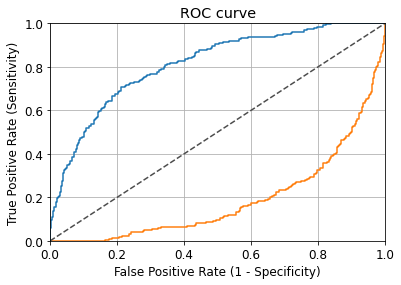

In [74]:
y_pred_quant = randomforest_model2.predict_proba(x_test_scaled)[:, 1]
y_pred_quant2 = randomforest_model2.predict_proba(x_test_scaled)[:, 0]
y_pred_bin = randomforest_model2.predict(x_test_scaled)

confux1 = confusion_matrix(y_test, y_pred_bin)
print('confusion_matrix\n', confux1)

total=sum(sum(confux1))

Negative = confux1[0,0]/(confux1[0,0]+confux1[1,0])
print('Negative Predictive Value : ', Negative )

specificity = confux1[0,0]/(confux1[0,0]+confux1[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_quant2)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot(fpr2, tpr2)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Predicted    0    1
Actual             
0          370   61
1           89  118


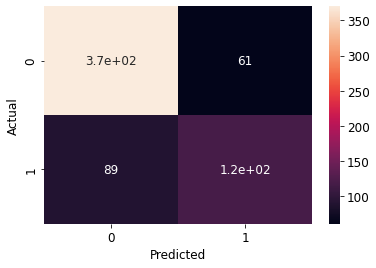

In [75]:
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, y_pred_bin, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [76]:
df = pd.DataFrame()
cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Precision",
        "Recall",
        "Sensivity",
        "Specificity"]

df.loc['Machine Learning Classification Method', 
       'Details'] = 'Random forest Classifier'
df.loc['Train Accuracy', 'Details'] = randomforest_model2.score(x_train_scaled, y_train) 
df.loc['Test Accuracy', 'Details'] = randomforest_model2.score(x_test_scaled, y_test)
df.loc['Precision', 'Details'] = metrics.precision_score(y_test, y_pred)
df.loc['Recall', 'Details'] = metrics.recall_score(y_test, y_pred)
df.loc['Negative', 'Details'] = Negative
df.loc['Specificity', 'Details'] = specificity
display(df)

,Details
Machine Learning Classification Method,Random forest Classifier
Train Accuracy,0.860887
Test Accuracy,0.76489
Precision,0.674556
Recall,0.550725
Negative,0.8061
Specificity,0.858469


# SUPPORT VECTOR MACHINE

In [77]:
from sklearn.svm import SVC
parameters = [{
        'C': [0.1,1, 10],
        'gamma': [1,0.1,0.01,'scale'],
        'kernel': ['rbf', 'poly', 'sigmoid']
    
              }]
svc = SVC(probability = True, random_state=2)
grid = GridSearchCV(estimator = svc, param_grid = parameters, cv = kf, n_jobs=-1)
grid.fit(x_train_scaled, y_train)

model = SVC(random_state=0)

SVC_model = SVC(C=grid.best_params_['C'],
                                            gamma = grid.best_params_['gamma'],
                                            kernel = grid.best_params_['kernel'],
                                             probability = True,
                                             random_state=2)
SVC_model.fit(x_train_scaled, y_train)
SVC_model_kfold = SVC_model.score(x_test_scaled, y_test)
y_pred = SVC_model.predict(x_test_scaled)
showMetric(y_test,y_pred)
print("Best value of each hyperparameters: {}".format(grid.best_params_))
print("Ensemble(random forest) accuracy score: ", round(SVC_model_kfold*100,2), "%")

Accuracy: 0.7554858934169278
Precision: 0.6440677966101694
Recall: 0.5507246376811594
Best value of each hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Ensemble(random forest) accuracy score:  75.55 %


confusion_matrix
 [[368  63]
 [ 93 114]]
Negative Predictive Value :  0.7982646420824295
Specificity :  0.8538283062645011


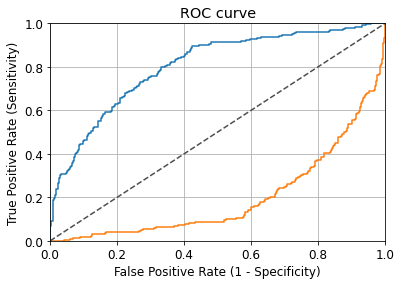

In [78]:
from sklearn.metrics import confusion_matrix
y_pred_quant = SVC_model.predict_proba(x_test_scaled)[:, 1]
y_pred_quant2 = SVC_model.predict_proba(x_test_scaled)[:, 0]
y_pred_bin = SVC_model.predict(x_test_scaled)

confux2= confusion_matrix(y_test, y_pred_bin)
print('confusion_matrix\n', confux2)

total=sum(sum(confux2))

Negative = confux2[0,0]/(confux2[0,0]+confux2[1,0])
print('Negative Predictive Value : ', Negative )

specificity = confux2[0,0]/(confux2[0,0]+confux2[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_quant2)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot(fpr2, tpr2)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

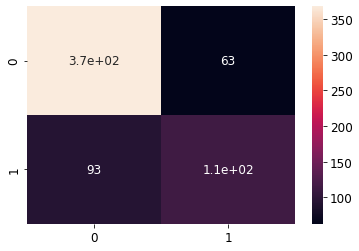

In [79]:
sn.heatmap(confux2, annot=True)
plt.show()

In [80]:
df = pd.DataFrame()
cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Precision",
        "Recall",
        "Sensivity",
        "Specificity"]

df.loc['Machine Learning Classification Method', 
       'Details'] = 'SVM Classifier'
df.loc['Train Accuracy', 'Details'] = SVC_model.score(x_train_scaled, y_train) 
df.loc['Test Accuracy', 'Details'] = SVC_model.score(x_test_scaled, y_test)
df.loc['Precision', 'Details'] = metrics.precision_score(y_test, y_pred)
df.loc['Recall', 'Details'] = metrics.recall_score(y_test, y_pred)
df.loc['Negative', 'Details'] = Negative
df.loc['Specificity', 'Details'] = specificity
display(df)

,Details
Machine Learning Classification Method,SVM Classifier
Train Accuracy,0.772177
Test Accuracy,0.755486
Precision,0.644068
Recall,0.550725
Negative,0.798265
Specificity,0.853828


# DECISION TREE

In [81]:
from sklearn import tree
parameters = [{
    "criterion": ['gini','entropy'],
    "max_depth": [7,8,9,10,11],  
              }]


treex = tree.DecisionTreeClassifier(random_state=2)
grid = GridSearchCV(estimator = treex, param_grid = parameters, cv = kf, n_jobs=-1)
grid.fit(x_train_scaled, y_train)

treex = tree.DecisionTreeClassifier(random_state=2)

Decision_model = tree.DecisionTreeClassifier(criterion=grid.best_params_['criterion'],
                                            max_depth = grid.best_params_['max_depth'],
                                             random_state=2)
Decision_model.fit(x_train_scaled, y_train)
Decision_model_kfold = Decision_model.score(x_test_scaled, y_test)
y_pred = Decision_model.predict(x_test_scaled)
showMetric(y_test,y_pred)
print("Best value of each hyperparameters: {}".format(grid.best_params_))
print("Ensemble(random forest) accuracy score: ", round(Decision_model_kfold*100,2), "%")

Accuracy: 0.670846394984326
Precision: 0.49407114624505927
Recall: 0.6038647342995169
Best value of each hyperparameters: {'criterion': 'entropy', 'max_depth': 7}
Ensemble(random forest) accuracy score:  67.08 %


confusion_matrix
 [[303 128]
 [ 82 125]]
Negative Predictive Value :  0.787012987012987
Specificity :  0.703016241299304


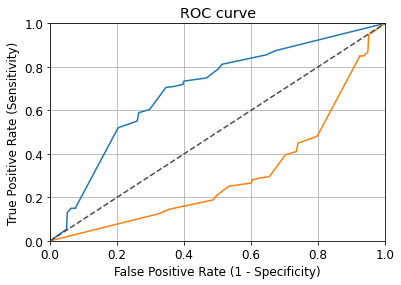

In [83]:
from sklearn.metrics import confusion_matrix
y_pred_quant = Decision_model.predict_proba(x_test_scaled)[:, 1]
y_pred_quant2 = Decision_model.predict_proba(x_test_scaled)[:, 0]
y_pred_bin = Decision_model.predict(x_test_scaled)

confux3 = confusion_matrix(y_test, y_pred_bin)
print('confusion_matrix\n', confux3)

total=sum(sum(confux3))

Negative = confux3[0,0]/(confux3[0,0]+confux3[1,0])
print('Negative Predictive Value : ', Negative )

specificity = confux3[0,0]/(confux3[0,0]+confux3[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_quant2)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot(fpr2, tpr2)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


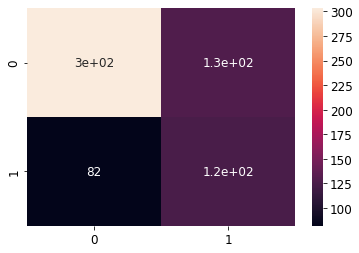

In [84]:
sn.heatmap(confux3, annot=True)
plt.show()

In [85]:
df = pd.DataFrame()
cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Precision",
        "Recall",
        "Sensivity",
        "Specificity"]

df.loc['Machine Learning Classification Method', 
       'Details'] = 'Decision tree Classifier'
df.loc['Train Accuracy', 'Details'] = Decision_model.score(x_train_scaled, y_train) 
df.loc['Test Accuracy', 'Details'] = Decision_model.score(x_test_scaled, y_test)
df.loc['Precision', 'Details'] = metrics.precision_score(y_test, y_pred)
df.loc['Recall', 'Details'] = metrics.recall_score(y_test, y_pred)
df.loc['Negative predictive', 'Details'] = Negative
df.loc['Specificity', 'Details'] = specificity
display(df)

,Details
Machine Learning Classification Method,Decision tree Classifier
Train Accuracy,0.795699
Test Accuracy,0.670846
Precision,0.494071
Recall,0.603865
Negative predictive,0.787013
Specificity,0.703016


# Prueba con algoritmos de regresión

In [86]:
X=fight_inner.iloc[:, 3:]
y=fight_inner.iloc[:, 1]
#Dividir el dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=2)
# # the scaler - for standardisation
# np.round(x_train.describe(), 1)
from sklearn.preprocessing import RobustScaler
scaled_features = x_train.copy()
col_names = ['Height','Weight','Str_Acc_%','Str_Def_%',
             'TD_Acc_%','SLpM','SApM','TD_Avg','Sub_Avg','TD_Def_%']
features = scaled_features[col_names]
scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
x_train_scaled = pd.DataFrame(scaled_features, columns=x_train.columns)
y_train_scaled = pd.DataFrame(y_train.to_frame(), columns=y_train.to_frame().columns)
scaled_features2 = x_test.copy()
col_names2 = ['Height','Weight','Str_Acc_%','Str_Def_%',
             'TD_Acc_%','SLpM','SApM','TD_Avg','Sub_Avg','TD_Def_%']
features2 = scaled_features2[col_names2]
features2 = scaler.transform(features2.values)
scaled_features2[col_names2] = features2
x_test_scaled = pd.DataFrame(scaled_features2, columns=x_test.columns)
parameters = [{
                'n_estimators': [200, 500,1000],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8],
                'criterion':['squared_error', 'absolute_error', 'poisson']
              }]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan      

MSE: 1042.9335167392119
RMSE: 32.29448121179858
MAE: 28.181176354764634
Best value of each hyperparameters: {'bootstrap': False, 'criterion': 'poisson', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 50, 'warm_start': True}


[Text(588.7300204918033, 513.4, 'X[0] <= 1.962\npoisson = 19.267\nsamples = 1488\nvalue = 38.015'),
 Text(484.53381147540983, 453.0, 'X[2] <= 0.939\npoisson = 19.251\nsamples = 1485\nvalue = 37.98'),
 Text(317.30532786885243, 392.6, 'X[8] <= 0.631\npoisson = 19.113\nsamples = 1325\nvalue = 36.202'),
 Text(243.55327868852459, 332.2, 'X[2] <= 0.932\npoisson = 19.011\nsamples = 1184\nvalue = 34.916'),
 Text(185.2377049180328, 271.8, 'X[8] <= 0.393\npoisson = 19.033\nsamples = 1182\nvalue = 34.88'),
 Text(109.77049180327869, 211.39999999999998, 'X[7] <= 0.35\npoisson = 19.643\nsamples = 1052\nvalue = 33.395'),
 Text(54.885245901639344, 151.0, 'X[1] <= -1.25\npoisson = 19.946\nsamples = 858\nvalue = 31.198'),
 Text(27.442622950819672, 90.59999999999997, 'X[6] <= 0.733\npoisson = 11.233\nsamples = 22\nvalue = 45.545'),
 Text(13.721311475409836, 30.199999999999932, 'poisson = 11.121\nsamples = 19\nvalue = 40.737'),
 Text(41.16393442622951, 30.199999999999932, 'poisson = 1.816\nsamples = 3\nva

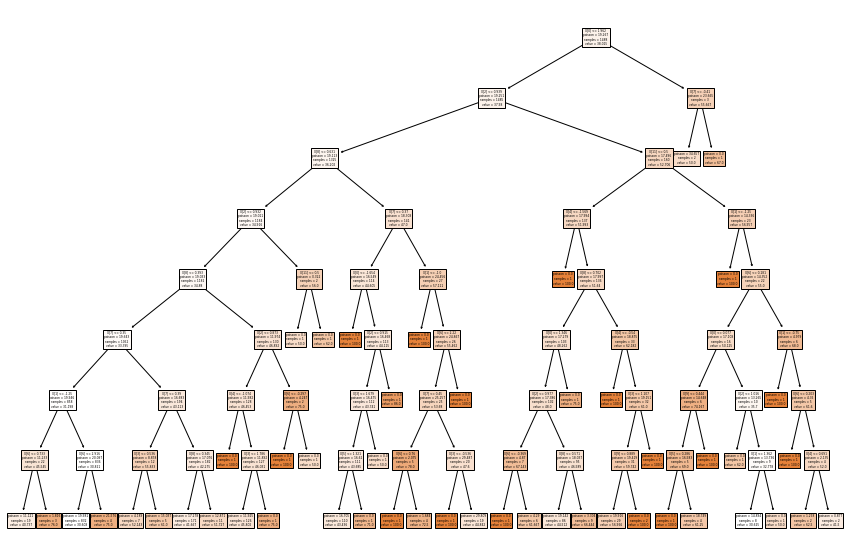

In [87]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(random_state=2)
parameters=[{
            'criterion': ['squared_error', 'absolute_error', 'poisson'],
            "n_estimators" : [10,50,500,1000],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False],
            'warm_start'   : [True, False],
            'max_depth' : [4,5,6,7,8],
        }]

grid = GridSearchCV(estimator = rfc, param_grid = parameters, cv = kf, n_jobs=-1)
grid.fit(x_train_scaled, y_train)

#model = RandomForestClassifier(random_state=2)

randomforest_model = RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],
                                            criterion = grid.best_params_['criterion'],
                                            max_depth = grid.best_params_['max_depth'],
                                           max_features=grid.best_params_['max_features'],
                                           bootstrap=grid.best_params_['bootstrap'],
                                           warm_start=grid.best_params_['warm_start'],
                                           random_state=2)
randomforest_model.fit(x_train_scaled, y_train)
randomforest_score_kfold = randomforest_model.score(x_test_scaled, y_test)
y_pred = randomforest_model.predict(x_test_scaled)
showMetric2(y_test,y_pred)
print("Best value of each hyperparameters: {}".format(grid.best_params_))

plt.figure(figsize=(15,10))
tree.plot_tree(randomforest_model.estimators_[1], filled=True)

In [88]:
from sklearn.svm import SVC
parameters = [{
        'C': [0.1,1, 10],
        'gamma': [1,0.1,0.01,'scale'],
        'kernel': ['rbf', 'poly', 'sigmoid']
    
              }]
svc = SVC(probability = True, random_state=2)
grid = GridSearchCV(estimator = svc, param_grid = parameters, cv = kf, n_jobs=-1)
grid.fit(x_train_scaled, y_train)

model = SVC(random_state=0)

SVC_model = SVC(C=grid.best_params_['C'],
                                            gamma = grid.best_params_['gamma'],
                                            kernel = grid.best_params_['kernel'],
                                             probability = True,
                                             random_state=2)
SVC_model.fit(x_train_scaled, y_train)
SVC_model_score_kfold = SVC_model.score(x_test_scaled, y_test)
y_pred = randomforest_model.predict(x_test_scaled)
showMetric2(y_test,y_pred)
print("Best value of each hyperparameters: {}".format(grid.best_params_))

MSE: 1042.9335167392119
RMSE: 32.29448121179858
MAE: 28.181176354764634
Best value of each hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [93]:
SVC_model = SVC(C=1,
                                            gamma = 0.1,
                                            kernel = 'rbf',
                                             probability = True,
                                             random_state=2)
SVC_model.fit(x_train_scaled, y_train)
SVC_model_score_kfold = SVC_model.score(x_test_scaled, y_test)
y_pred = randomforest_model.predict(x_test_scaled)
showMetric2(y_test,y_pred)
df = pd.DataFrame()
cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Precision",
        "Recall",
        "Sensivity",
        "Specificity"]

df.loc['Machine Learning Classification Method', 
       'Details'] = 'SVM Regressor'
df.loc['MSE', 'Details'] = metrics.mean_squared_error(y_test, y_pred) 
df.loc['RMSE', 'Details'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
df.loc['MAE', 'Details'] = mean_absolute_error(y_test, y_pred)
display(df)

MSE: 1042.9335167392119
RMSE: 32.29448121179858
MAE: 28.181176354764634


,Details
Machine Learning Classification Method,SVM Regressor
MSE,1042.933517
RMSE,32.294481
MAE,28.181176


In [92]:
from sklearn.ensemble import RandomForestRegressor
randomforest_model = RandomForestRegressor(n_estimators=50,
                                            criterion = 'poisson',
                                            max_depth = 8,
                                           max_features='log2',
                                           bootstrap=False,
                                           warm_start=True,
                                           random_state=2)
randomforest_model.fit(x_train_scaled, y_train)
randomforest_score_kfold = randomforest_model.score(x_test_scaled, y_test)
y_pred = randomforest_model.predict(x_test_scaled)
df = pd.DataFrame()
df.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Regressor'
df.loc['MSE', 'Details'] = metrics.mean_squared_error(y_test, y_pred) 
df.loc['RMSE', 'Details'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
df.loc['MAE', 'Details'] = mean_absolute_error(y_test, y_pred)
display(df)

,Details
Machine Learning Classification Method,Random Forest Regressor
MSE,1042.933517
RMSE,32.294481
MAE,28.181176
